In [8]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from auxPlots import interpolateData,getContours
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load data

In [9]:
pts = np.genfromtxt('../CDFOdata_2112_01499v3_Fig9_without_Stable.dat',skip_header=6,names=True)
print(pts.dtype)

[('mxGeV', '<f8'), ('deltamGeV', '<f8'), ('msbGeV', '<f8'), ('yDMrelic', '<f8'), ('ctaum', '<f8'), ('relic_density', '<f8'), ('relDelta', '<f8')]


In [10]:
maxCurve = []
for mn1 in np.unique(pts['mxGeV']):
    maxCurve.append([mn1,max(pts[pts['mxGeV'] == mn1]['deltamGeV'])])
maxCurve = np.array(maxCurve)

curveF = interp1d(maxCurve[:,0],maxCurve[:,1],bounds_error=False,fill_value='extrapolate')

#### Get WIMP DD curve

In [11]:
wimpData = np.genfromtxt('../WIMPregion_DDconstr_LZ.dat',names=True)
# Remove points below curve:
x = wimpData['mchiGeV']
y = wimpData['DmGeV']
z = wimpData['rval_DDLZ']

xnew,ynew,znew = interpolateData(x,y,z,nx=1000,ny=1000)
contours = getContours(xnew,ynew,znew,[1.0])
# Remove points below curve and split contours into two disjoint parts
contourL = []
contourR = []
for pt in contours[1.0]:
    if pt[1] < curveF(pt[0]):
        continue
    if pt[0] < 1200.0:
        contourL.append(pt)
    else:
        contourR.append(pt)
contourL = np.array(contourL[:-10]) # Remove the last points so the contour does not close
contourR = np.array(contourR[:-10]) # Remove the last points so the contour does not close

In [12]:
# Add missing points
contourL = np.append(contourL,maxCurve[:3][::-1],axis=0)
contourL = np.insert(contourL,0,[maxCurve[:,0].min(),contourL[:,1].max()],axis=0)

### Plot lifetime

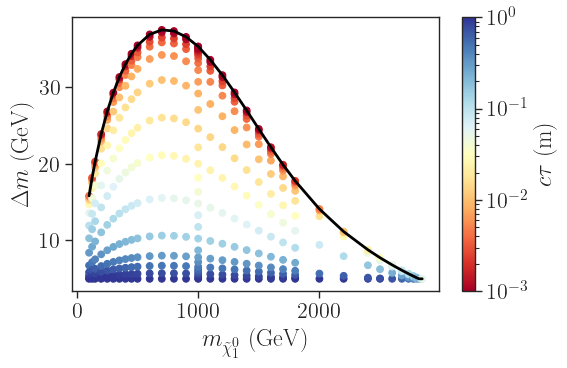

In [13]:
fig = plt.figure(figsize=(6,4))
mn1 = pts['mxGeV']
deltam = pts['deltamGeV']
ctau = pts['ctaum']
plt.scatter(mn1,deltam,c=ctau,cmap=cm,norm=LogNorm(vmin=1e-3,vmax=1.0))
plt.plot(maxCurve[:,0],maxCurve[:,1],c='black',linewidth=2)
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
plt.colorbar(label=r'$c \tau$ (m)')
plt.tight_layout()
plt.show()


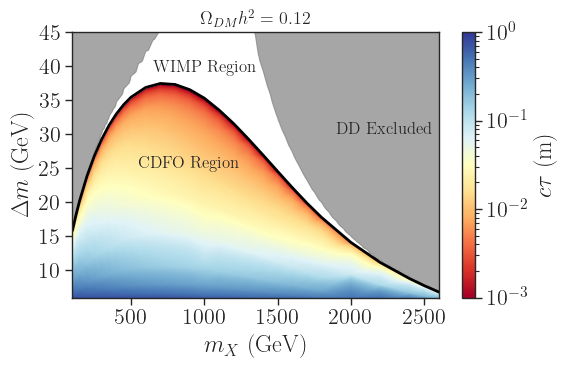

In [14]:
plt.figure(figsize=(6,4))
x = pts['mxGeV']
y = pts['deltamGeV']
z = pts['ctaum']
xnew,ynew,znew = interpolateData(x,y,z,method='linear',nx=500,ny=500)

# znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[xnew.min(),xnew.max(), ynew.min(), ynew.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1.0))

plt.fill_between(maxCurve[:,0],maxCurve[:,1],40,color='white')

# plt.fill(contourL[:,0],contourL[:,1],color='gray',alpha=0.7)
plt.fill_betweenx(contourL[:,1],contourL[:,0],x2=maxCurve[:,0].min(),color='gray',alpha=0.7)
plt.fill(contourR[:,0],contourR[:,1],color='gray',alpha=0.7)


plt.plot(maxCurve[:,0],maxCurve[:,1],c='black',linewidth=2)
plt.text(550.,25.,'CDFO Region',fontsize=12)
plt.text(650.,39.,'WIMP Region',fontsize=12)
plt.text(1900.,30.,'DD Excluded',fontsize=12)
plt.colorbar(label=r'$c \tau$ (m)')
plt.xlim(maxCurve[:,0].min(),maxCurve[:,0].max())
plt.xlabel(r'$m_{X}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
plt.yticks(np.arange(5.,50.,5.))
plt.ylim(6,45)
plt.xlim(100.,2600.)
plt.title(r'$\Omega_{DM} h^2 = 0.12$',fontsize=13)
plt.tight_layout()
plt.savefig('lifetime.png')
plt.show()

